In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [45]:
#read data
ppi_df = pd.read_csv("mapc.health_mapc_ppi_g250.csv")
cities_df = pd.read_excel("cities_and_towns.xlsx")
municipal_keys_df = pd.read_csv("tabular._datakeys_muni_all.csv")
bus_df = pd.read_csv("MBTA_Bus_Routes_and_Stops.csv")

In [46]:
#clean data
ppi_df = ppi_df[['commtype', 'nhwhi_10', 'nhaa_10','nhapi_10', 'lat_10', 'nhoth_10', 'ppi5']]
ppi_df = ppi_df[ppi_df['ppi5'] > 0]
ppi_df = ppi_df[ppi_df['commtype'] != '']
ppi_df = ppi_df[ppi_df['commtype'] != ' ']
municipal_keys_df = municipal_keys_df[['muni_name','mapc','cmtyp08','mbta', 'mbta14', 'mbta51',
       'mbta_other','mbta_cmtyp']]
municipal_keys_df = municipal_keys_df[municipal_keys_df['mapc'] == 1]
municipal_keys_df = municipal_keys_df[municipal_keys_df['mbta'] == 1]
municipal_keys_df = municipal_keys_df[municipal_keys_df['mbta_cmtyp'].notnull()]
municies = municipal_keys_df['muni_name']
cities_df = cities_df[cities_df['Municipality'].isin(municies)]
bus_df = bus_df.rename(columns={'TOWN':'Municipality'})
num_stops = bus_df.groupby("Municipality").count()
num_stops = num_stops[['X']]
num_stops = num_stops.rename(columns={'X': 'count'})
num_stops = num_stops.reset_index()
num_stops['Municipality'] = num_stops['Municipality'].str.title()

In [47]:
num_stops.head()

,Municipality,count
0,Arlington,162
1,Avon,5
2,Bedford,56
3,Belmont,78
4,Beverly,80


In [142]:
municipal_keys_df.head()

,muni_name,mapc,cmtyp08,mbta,mbta14,mbta51,mbta_other,mbta_cmtyp
1,Acton,1,Maturing Suburb,1,0,0,1,Commuter Rail
9,Arlington,1,Inner Core,1,1,0,0,Subway Or Light Rail
13,Ashland,1,Maturing Suburb,1,0,0,1,Commuter Rail
23,Bedford,1,Maturing Suburb,1,0,1,0,Bus
25,Bellingham,1,Developing Suburb,1,0,0,1,MBTA Adjacent


In [143]:
ppi_df.head()

,commtype,nhwhi_10,nhaa_10,nhapi_10,lat_10,nhoth_10,ppi5
0,Maturing Suburbs,26.88,0.37,3.03,0.37,1.04,2
1,Maturing Suburbs,33.00,0.00,14.59,0.31,2.10,1
2,Developing Suburbs,2.66,0.00,0.00,0.00,0.00,4
5,Maturing Suburbs,13.99,1.12,2.48,0.00,1.80,1
6,Maturing Suburbs,106.67,3.17,0.80,3.73,0.89,2


In [144]:
cities_df.head()

,Municipality,Type,Per capita income,Median household income,Median family income,Households,Population
0,Dover,Town,"$133,500.00","$250,000+","$250,000+",1916,5894
1,Weston,Town,"$107,793.00","$220,815.00","$250,000+",3731,11806
2,Wellesley,Town,"$97,262.00","$226,250.00","$250,000+",8668,29365
3,Lexington,Town,"$96,170.00","$202,852.00","$235,039.00",12301,34235
4,Sherborn,Town,"$96,081.00","$218,906.00","$242,443.00",1515,4406


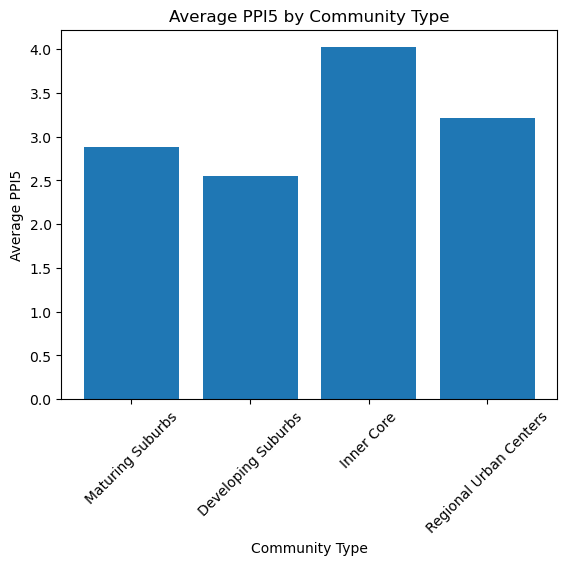

In [145]:
grouped_data = ppi_df.groupby('commtype')['ppi5'].mean()
community_types = ['Maturing Suburbs', 'Developing Suburbs', 'Inner Core', 'Regional Urban Centers']

plt.bar(community_types, grouped_data[commtype_order])
plt.xlabel('Community Type')
plt.ylabel('Average PPI5')
plt.title('Average PPI5 by Community Type')
plt.xticks(rotation=45) 
plt.show()

C:\Users\sammy\AppData\Local\Temp\ipykernel_30508\4088100029.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.0%}'.format(y/100) for y in ax.get_yticks()])


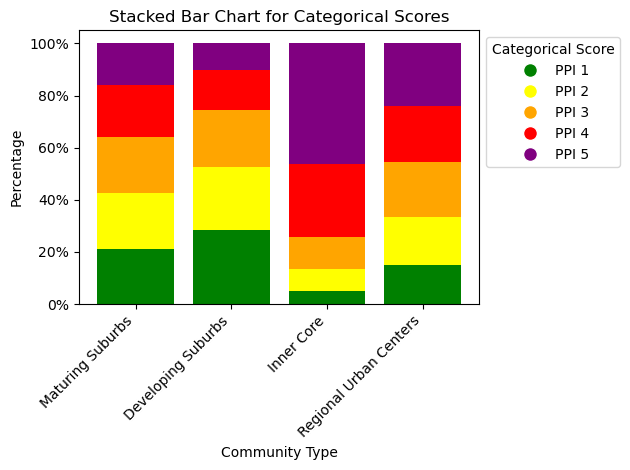

In [146]:
community_types = ppi_df['commtype'].unique()

# Unique categorical scores
categories = sorted(ppi_df['ppi5'].unique())

# Colors for each categorical score
colors = ['green', 'yellow', 'orange', 'red', 'purple']

# Plotting the stacked bars
fig, ax = plt.subplots()

for i, community_type in enumerate(community_types):
    subset = ppi_df[ppi_df['commtype'] == community_type]
    total_rows = subset.shape[0]
    bottoms = np.zeros(total_rows)

    for j, category in enumerate(categories):
        heights = [subset[subset['ppi5'] == category].shape[0] / total_rows * 100]
        ax.bar(community_type, heights, bottom=bottoms, label=f'Score {category}', color=colors[j])
        bottoms += heights

# Setting labels and title
ax.set_xlabel('Community Type')
ax.set_ylabel('Percentage')
ax.set_title('Stacked Bar Chart for Categorical Scores')
ax.legend(title='Categorical Score', bbox_to_anchor=(1, 1))

# Setting y-axis to percentage
ax.set_yticklabels(['{:,.0%}'.format(y/100) for y in ax.get_yticks()])
plt.xticks(rotation=45, ha="right")

legend_labels = ['PPI 1', 'PPI 2', 'PPI 3', 'PPI 4', 'PPI 5']
legend_entries = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=colors[i], markersize=10, label=legend_labels[i]) for i in range(len(legend_labels))]
ax.legend(handles=legend_entries, title='Categorical Score', bbox_to_anchor=(1, 1))

plt.tight_layout()

# Show the plot
plt.show()

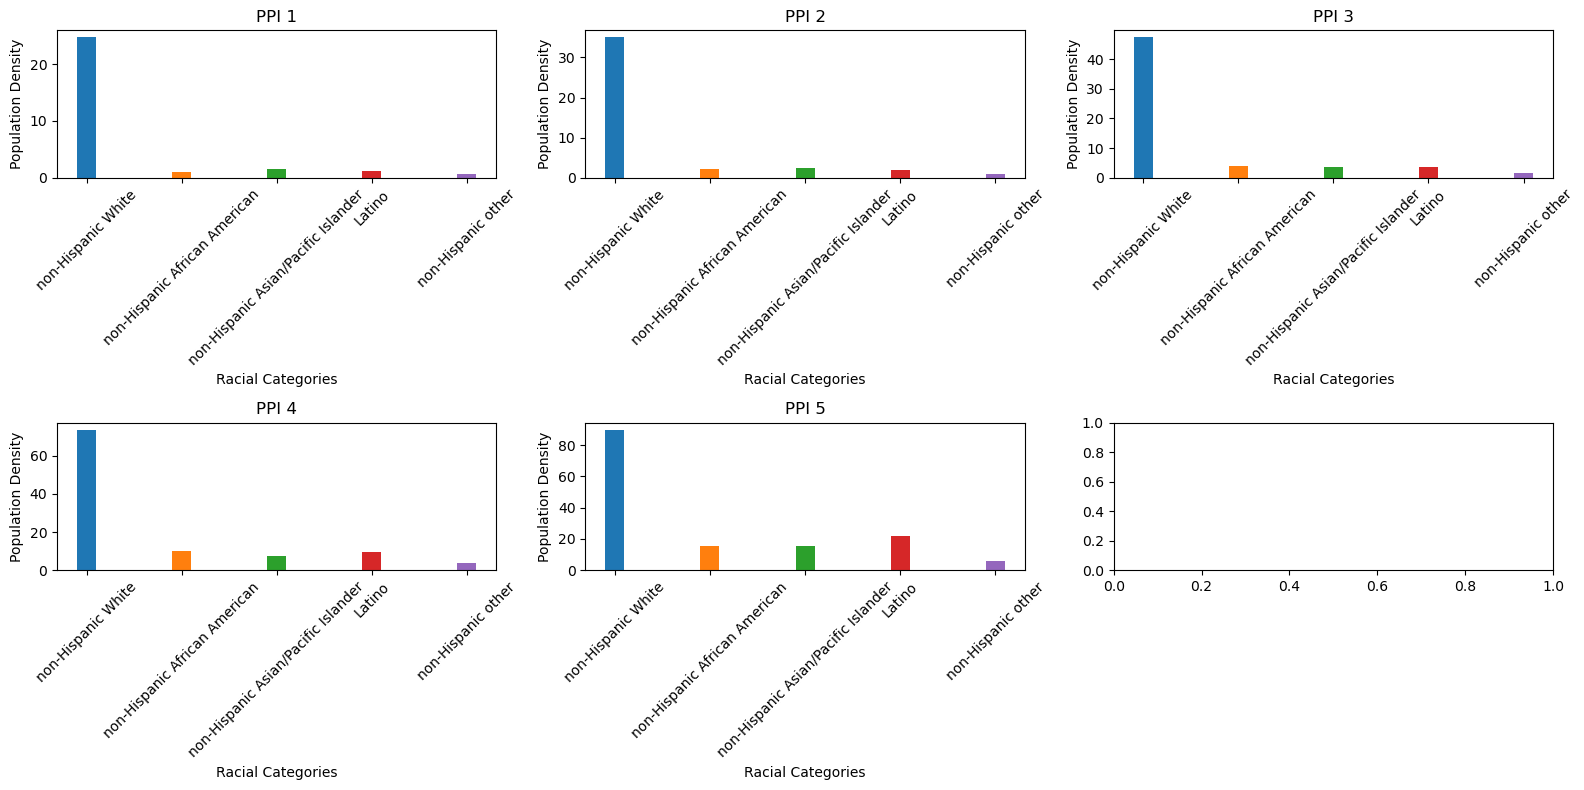

In [147]:
df = ppi_df.rename(columns={'nhwhi_10': 'non-Hispanic White', 'nhaa_10': 'non-Hispanic African American',
                        'nhapi_10': 'non-Hispanic Asian/Pacific Islander','lat_10': 'Latino',
                        'nhoth_10': 'non-Hispanic other'})
racial_categories = ['non-Hispanic White', 'non-Hispanic African American', 
                                          'non-Hispanic Asian/Pacific Islander', 'Latino', 'non-Hispanic other']
ppi_values = [1, 2, 3, 4, 5]  # List of PPI values

fig, axes = plt.subplots(2, 3, figsize=(16, 8))  # Create 2 rows and 3 columns of subplots, only need 5 of them

for i, ppi_value in enumerate(ppi_values):
    # Get the mean values for a specific PPI value
    ppi_df_avg = df[df['ppi5'] == ppi_value][racial_categories].mean()

    # Create a bar chart within the current subplot
    row = i // 3  # Calculate the row number (0 or 1)
    col = i % 3   # Calculate the column number (0, 1, or 2)
    ax = axes[row, col]

    bar_width = 0.2
    index = np.arange(len(ppi_df_avg.index))
    labels = ppi_df_avg.index

    for j, label in enumerate(labels):
        ax.bar(index[j], ppi_df_avg[label], width=bar_width, label=label)

    ax.set_xlabel('Racial Categories')
    ax.set_ylabel('Population Density')
    ax.set_title(f'PPI {ppi_value}')
    ax.set_xticks(index)
    ax.set_xticklabels(labels, rotation=45)

# Adjust spacing between subplots
plt.tight_layout()
plt.show()

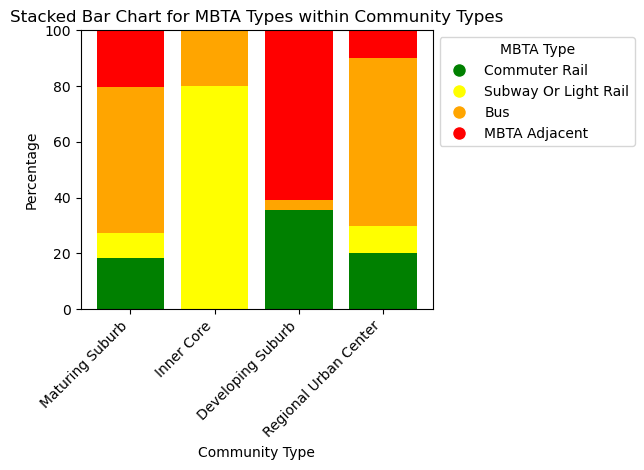

In [148]:
community_types = municipal_keys_df['cmtyp08'].unique()

# Unique MBTA types
mbta_types = municipal_keys_df['mbta_cmtyp'].unique()

# Colors for each MBTA type
colors = ['green', 'yellow', 'orange', 'red', 'purple']

# Plotting the stacked bars
fig, ax = plt.subplots()

for i, community_type in enumerate(community_types):
    subset = municipal_keys_df[municipal_keys_df['cmtyp08'] == community_type]
    total_rows = subset.shape[0]
    bottoms = np.zeros(total_rows)

    for j, mbta_type in enumerate(mbta_types):
        heights = [subset[subset['mbta_cmtyp'] == mbta_type].shape[0] / total_rows * 100]
        ax.bar(community_type, heights, bottom=bottoms, label=mbta_type, color=colors[j])
        bottoms += heights

# Setting labels and title
ax.set_xlabel('Community Type')
ax.set_ylabel('Percentage')
ax.set_title('Stacked Bar Chart for MBTA Types within Community Types')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha="right")

# Create a custom legend with desired labels
legend_labels = mbta_types
legend_entries = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=colors[i], markersize=10, label=legend_labels[i]) for i in range(len(legend_labels))]
ax.legend(handles=legend_entries, title='MBTA Type', bbox_to_anchor=(1, 1))

# Adjust layout to prevent clipping of rotated labels
plt.tight_layout()

# Show the plot
plt.show()

In [51]:
municipal_keys_df = municipal_keys_df.rename(columns={'muni_name': 'Municipality'})
merged = pd.merge(cities_df, municipal_keys_df, on='Municipality', how='inner')
#merged = pd.merge(num_stops, merged, on='Municipality', how='inner')
merged.head()

,Municipality,Type,Per capita income,Median household income,Median family income,Households,Population,mapc,cmtyp08,mbta,mbta14,mbta51,mbta_other,mbta_cmtyp
0,Dover,Town,"$133,500.00","$250,000+","$250,000+",1916,5894,1,Developing Suburb,1,0,1,0,MBTA Adjacent
1,Weston,Town,"$107,793.00","$220,815.00","$250,000+",3731,11806,1,Maturing Suburb,1,0,1,0,Subway Or Light Rail
2,Wellesley,Town,"$97,262.00","$226,250.00","$250,000+",8668,29365,1,Maturing Suburb,1,0,1,0,Subway Or Light Rail
3,Lexington,Town,"$96,170.00","$202,852.00","$235,039.00",12301,34235,1,Maturing Suburb,1,0,1,0,Bus
4,Sherborn,Town,"$96,081.00","$218,906.00","$242,443.00",1515,4406,1,Developing Suburb,1,0,0,1,MBTA Adjacent


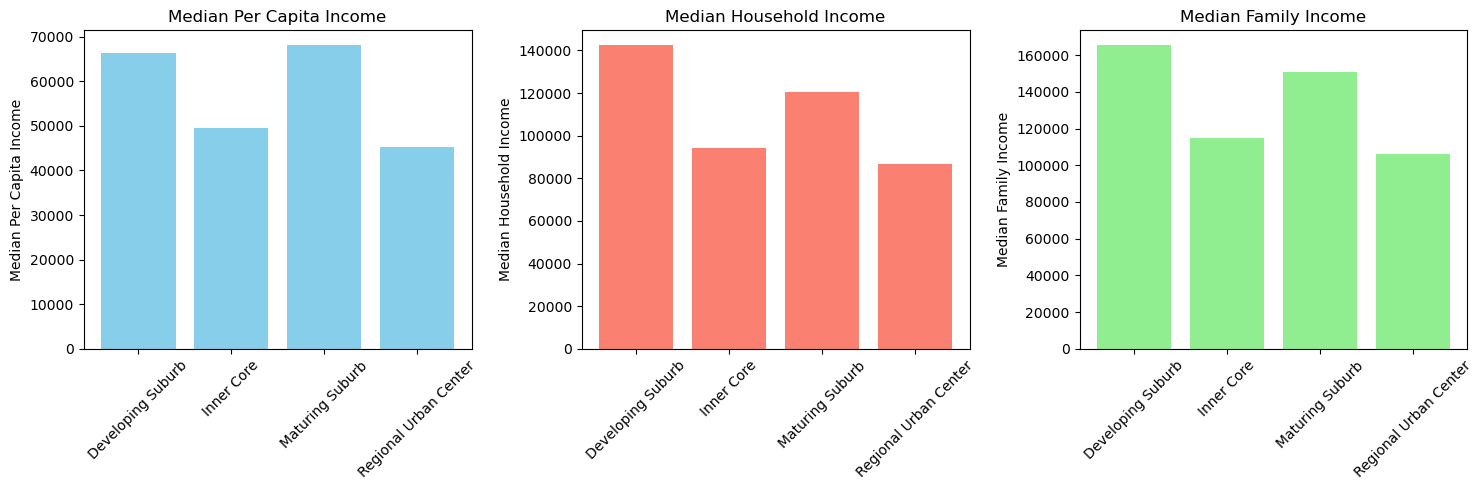

In [52]:
merged['Per capita income'] = pd.to_numeric(merged['Per capita income'].replace('[\$,+]', '', regex=True), errors='coerce')
merged['Median household income'] = pd.to_numeric(merged['Median household income'].replace('[\$,+]', '', regex=True), errors='coerce')
merged['Median family income'] = pd.to_numeric(merged['Median family income'].replace('[\$,+]', '', regex=True), errors='coerce')

avg_per_capita_income = merged.groupby('cmtyp08')['Per capita income'].mean()
median_household_income = merged.groupby('cmtyp08')['Median household income'].median()
median_family_income = merged.groupby('cmtyp08')['Median family income'].median()

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Plot Average Per Capita Income
axes[0].bar(avg_per_capita_income.index, avg_per_capita_income, color='skyblue')
axes[0].set_title('Median Per Capita Income')
axes[0].set_ylabel('Median Per Capita Income')
axes[0].tick_params(axis='x', rotation=45) 

# Plot Median Household Income
axes[1].bar(median_household_income.index, median_household_income, color='salmon')
axes[1].set_title('Median Household Income')
axes[1].set_ylabel('Median Household Income')
axes[1].tick_params(axis='x', rotation=45) 

# Plot Median Family Income
axes[2].bar(median_family_income.index, median_family_income, color='lightgreen')
axes[2].set_title('Median Family Income')
axes[2].set_ylabel('Median Family Income')
axes[2].tick_params(axis='x', rotation=45) 

# Show the subplots
plt.tight_layout()
plt.show()

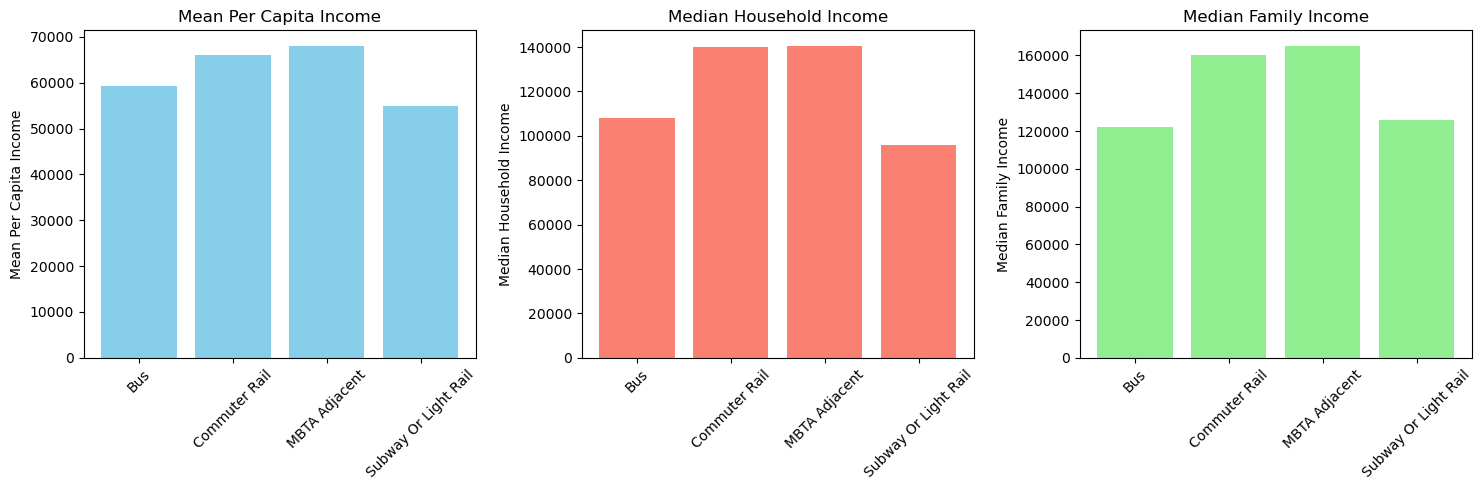

In [53]:
avg_per_capita_income = merged.groupby('mbta_cmtyp')['Per capita income'].mean()
median_household_income = merged.groupby('mbta_cmtyp')['Median household income'].median()
median_family_income = merged.groupby('mbta_cmtyp')['Median family income'].median()

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Plot Average Per Capita Income
axes[0].bar(avg_per_capita_income.index, avg_per_capita_income, color='skyblue')
axes[0].set_title('Mean Per Capita Income')
axes[0].set_ylabel('Mean Per Capita Income')
axes[0].tick_params(axis='x', rotation=45) 

# Plot Median Household Income
axes[1].bar(median_household_income.index, median_household_income, color='salmon')
axes[1].set_title('Median Household Income')
axes[1].set_ylabel('Median Household Income')
axes[1].tick_params(axis='x', rotation=45) 

# Plot Median Family Income
axes[2].bar(median_family_income.index, median_family_income, color='lightgreen')
axes[2].set_title('Median Family Income')
axes[2].set_ylabel('Median Family Income')
axes[2].tick_params(axis='x', rotation=45) 

# Show the subplots
plt.tight_layout()
plt.show()

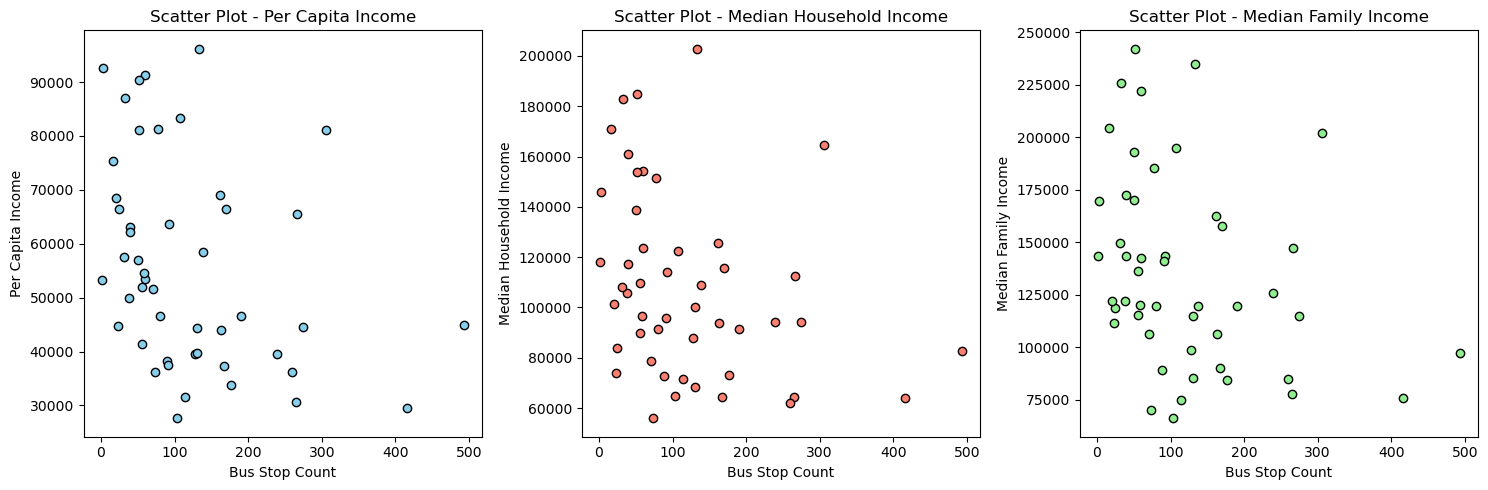

In [56]:
merged = pd.merge(num_stops, merged, on='Municipality', how='inner')
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Plot Histogram for Per Capita Income
axes[0].scatter(merged['count'], merged['Per capita income'], color='skyblue', edgecolor='black')
axes[0].set_title('Scatter Plot - Per Capita Income')
axes[0].set_xlabel('Bus Stop Count')
axes[0].set_ylabel('Per Capita Income')

# Scatter plot for Median Household Income
axes[1].scatter(merged['count'], merged['Median household income'], color='salmon', edgecolor='black')
axes[1].set_title('Scatter Plot - Median Household Income')
axes[1].set_xlabel('Bus Stop Count')
axes[1].set_ylabel('Median Household Income')

# Scatter plot for Median Family Income
axes[2].scatter(merged['count'], merged['Median family income'], color='lightgreen', edgecolor='black')
axes[2].set_title('Scatter Plot - Median Family Income')
axes[2].set_xlabel('Bus Stop Count')
axes[2].set_ylabel('Median Family Income')

# Show the histograms
plt.tight_layout()
plt.show()

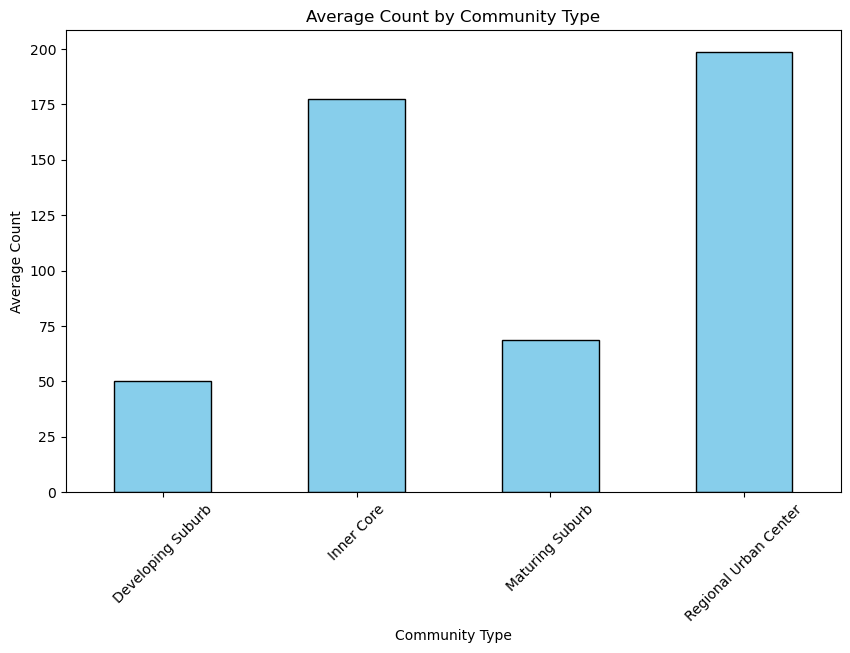

In [63]:
num_stops_avg = merged.groupby('cmtyp08')['count'].mean()

plt.figure(figsize=(10, 6))
num_stops_avg.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Average Count by Community Type')
plt.xlabel('Community Type')
plt.ylabel('Average Count')
plt.xticks(rotation=45) 
plt.show()